In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('2022_forbes_billionaires.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head(10)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,$111 B,49,United States,Google,Technology
6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [77]:
#Checking for duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Length: 2600, dtype: bool

In [78]:
#Checking for null values
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [79]:
#Data cleaning
df['networth'] = df['networth'].str.replace('$','') #removing the dollar sign
df['networth']=df['networth'].str.replace(' B','') #removing the b as in billion
df['networth']=df['networth'].apply(pd.to_numeric) #changing the data type to numeric

C:\Users\Imran\AppData\Local\Temp\ipykernel_64420\1936692939.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['networth'] = df['networth'].str.replace('$','') #removing the dollar sign


In [80]:
#Determining top countries with most billionaires
df['country'].value_counts()

United States           719
China                   515
India                   161
Germany                 130
Russia                   81
                       ... 
Venezuela                 1
Portugal                  1
Algeria                   1
Eswatini (Swaziland)      1
Estonia                   1
Name: country, Length: 75, dtype: int64

In [102]:
#Determining top industries with most billionaires
df['industry'].value_counts()

Finance & Investments          386
Technology                     329
Manufacturing                  322
Fashion & Retail               246
Healthcare                     212
Food & Beverage                201
Real Estate                    189
Diversified                    178
Media & Entertainment           95
Energy                          93
Automotive                      69
Metals & Mining                 67
Service                         51
Construction & Engineering      43
Logistics                       35
Telecom                         35
Sports                          26
Gambling & Casinos              23
Name: industry, dtype: int64

Text(0.5, 1.0, 'Correlation')

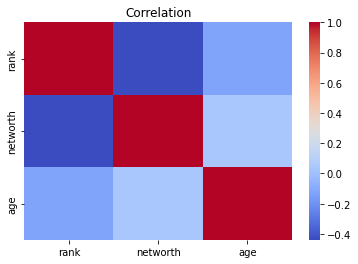

In [90]:
#Checking the correlation between all the columns
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation')

C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='networth'>

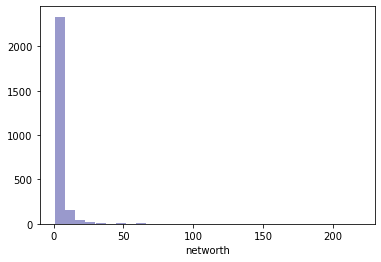

In [82]:
#Distribution Plot without kernel density estimation (KDE)
sns.distplot(df['networth'], 
             bins = 30, 
             kde = False, 
             color = 'navy')

<AxesSubplot:xlabel='networth', ylabel='Density'>

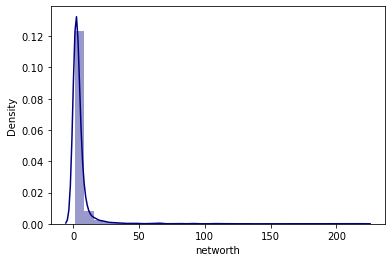

In [83]:
sns.distplot(df['networth'], 
             bins = 30, 
             color = 'navy')

In [84]:
#Rough idea of the youngest billionaire
df.sort_values(by=['age'])

,rank,name,networth,age,country,source,industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals & Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance & Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance & Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance & Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food & Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


<AxesSubplot:xlabel='age'>

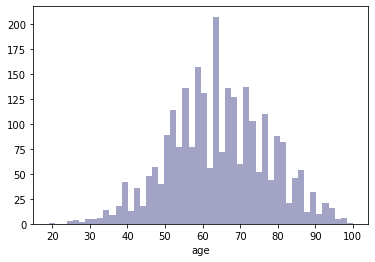

In [66]:
#Dist plot (Distribution of billionaires at different ages)
sns.distplot(df['age'], 
             bins = 50, 
             kde = False,
             color = '#191970')

C:\Users\Imran\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

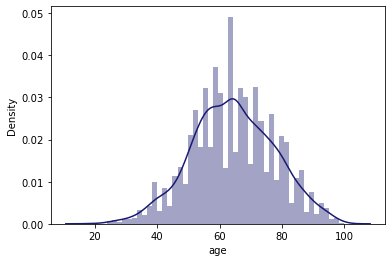

In [85]:
sns.distplot(df['age'], 
             bins = 50, 
             color = '#191970')

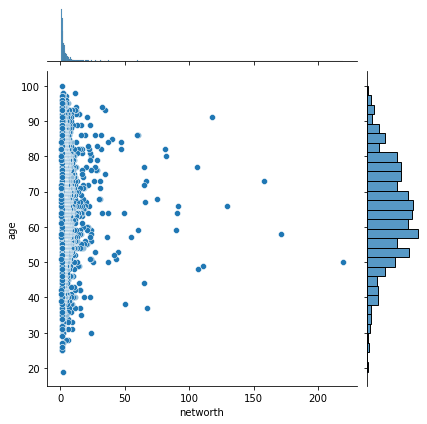

In [89]:
#Joint plot (Age VS Net Worth)
sns.jointplot(x = 'networth', 
              y = 'age', 
              data = df, 
              kind = 'scatter')